In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
train_data=pd.read_csv('train (4).csv')
test_data=pd.read_csv('test (1).csv')

In [10]:
print('train_data', train_data.shape)
print('test_data', test_data.shape)

train_data (891, 12)
test_data (418, 11)


In [11]:
train_data.sample(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
693,694,0,3,"Saad, Mr. Khalil",male,25.0,0,0,2672,7.225,NaN,C
789,790,0,1,"Guggenheim, Mr. Benjamin",male,46.0,0,0,PC 17593,79.200,B82 B84,C
784,785,0,3,"Ali, Mr. William",male,25.0,0,0,SOTON/O.Q. 3101312,7.050,NaN,S


In [12]:
test_data.sample(3)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S
223,1115,3,"Karlsson, Mr. Einar Gervasius",male,21.0,0,0,350053,7.7958,NaN,S
406,1298,2,"Ware, Mr. William Jeffery",male,23.0,1,0,28666,10.5000,NaN,S


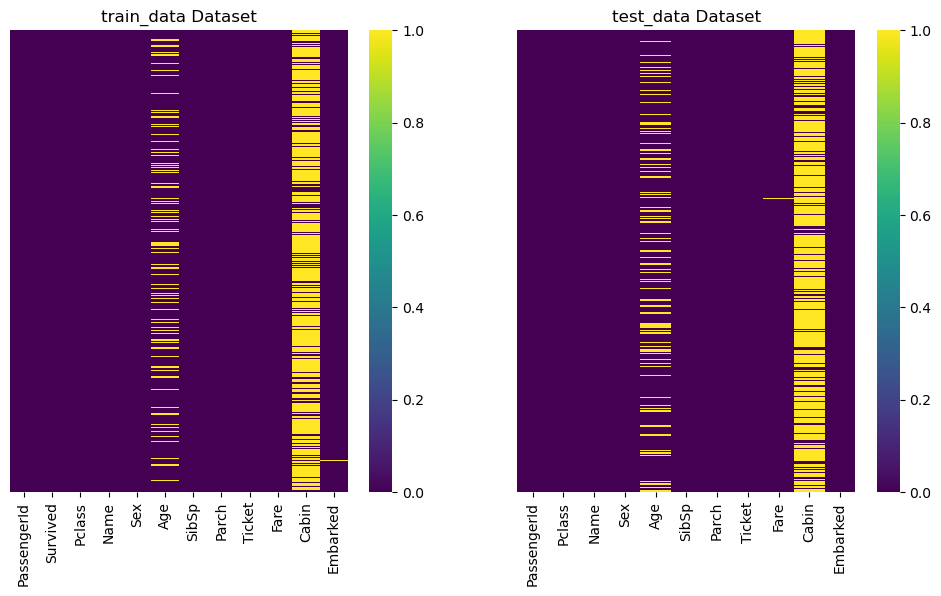

In [13]:
plt.figure(figsize=(12,6))
plt.subplot(121)
sns.heatmap(train_data.isnull(), cmap='viridis', yticklabels=False)
plt.title('train_data Dataset')
plt.subplot(122)
sns.heatmap(test_data.isnull(), cmap='viridis', yticklabels=False)
plt.title('test_data Dataset')
plt.show()

In [14]:
train_data.isnull().mean().sort_values(ascending=False)*100

Cabin          77.104377
Age            19.865320
Embarked        0.224467
PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
dtype: float64

In [15]:
test_data.isnull().mean().sort_values(ascending=False)*100

Cabin          78.229665
Age            20.574163
Fare            0.239234
PassengerId     0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Embarked        0.000000
dtype: float64

In [16]:
train_data.drop(columns=['Cabin'], inplace=True)
test_data.drop(columns=['Cabin'], inplace=True)

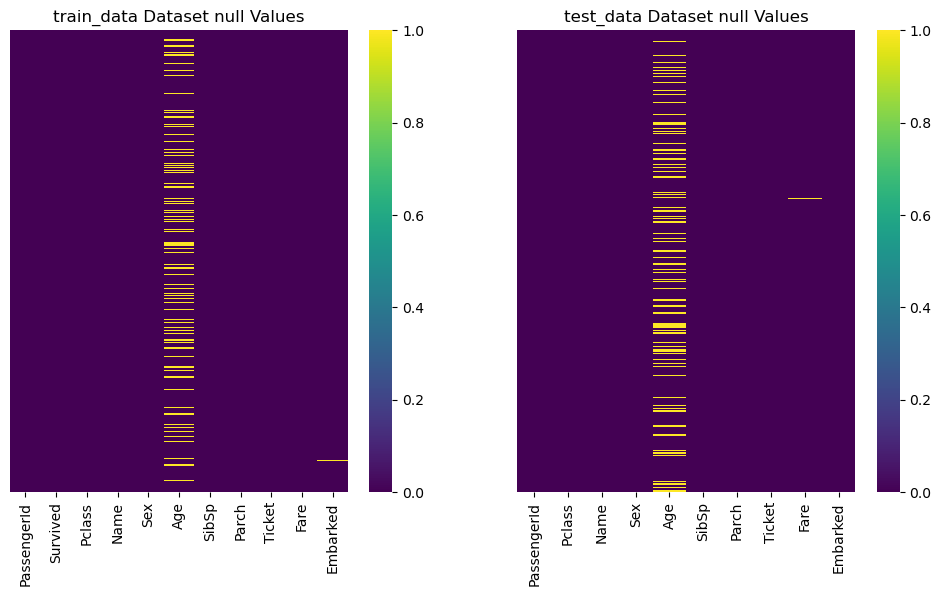

In [17]:
plt.figure(figsize=(12,6))
plt.subplot(121)
sns.heatmap(train_data.isnull(), yticklabels=False, cmap='viridis')
plt.title('train_data Dataset null Values')
plt.subplot(122)
sns.heatmap(test_data.isnull(), yticklabels=False, cmap='viridis')
plt.title('test_data Dataset null Values')
plt.show()

In [18]:
train_data['Embarked'].fillna(train_data['Embarked'].mode()[0], inplace=True)

In [19]:
train_data.isnull().sum().sort_values(ascending=False)

Age            177
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Embarked         0
dtype: int64

In [20]:
test_data[test_data['Fare'].isnull()]

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
152,1044,3,"Storey, Mr. Thomas",male,60.5,0,0,3701,NaN,S


In [21]:
test_data[(test_data['Pclass']==3) & (test_data['Embarked']=='S')]['Fare'].mean()

13.913029787234043

In [22]:
test_data['Fare'].fillna(13.91, inplace=True)

In [23]:
test_data.iloc[152]

PassengerId                  1044
Pclass                          3
Name           Storey, Mr. Thomas
Sex                          male
Age                          60.5
SibSp                           0
Parch                           0
Ticket                       3701
Fare                        13.91
Embarked                        S
Name: 152, dtype: object

In [24]:
test_data['Fare'].isnull().sum()

0

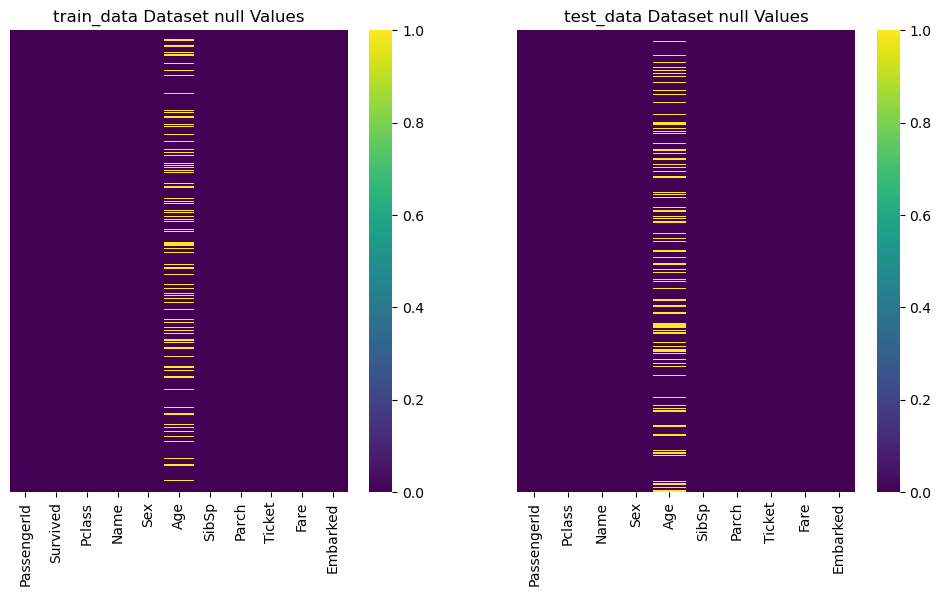

In [25]:
plt.figure(figsize=(12,6))
plt.subplot(121)
sns.heatmap(train_data.isnull(), yticklabels=False, cmap='viridis')
plt.title('train_data Dataset null Values')
plt.subplot(122)
sns.heatmap(test_data.isnull(), yticklabels=False, cmap='viridis')
plt.title('test_data Dataset null Values')
plt.show()

In [26]:
train_data[train_data['Sex']=='male']['Age'].mean()

30.72664459161148

In [27]:
train_data['Sex'].unique()

array(['male', 'female'], dtype=object)

In [32]:
train_data[train_data['Sex']=='female']['Age'].mean()

27.915708812260537

In [46]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


In [67]:
train_data['Age'].mean()-train_data['Age'].std()

15.172620314724776

In [68]:
train_data['Age'].std()

14.526497332334044

In [69]:
train_data['Age'].mean()

29.69911764705882

In [71]:
train_data['Age'].isnull().sum()

177

In [73]:
train_age=np.random.randint(train_data['Age'].mean()-train_data['Age'].std(), train_data['Age'].mean()+train_data['Age'].std(), 177)

In [74]:
test_data['Age'].isnull().sum()

86

In [75]:
test_age=np.random.randint(test_data['Age'].mean()-test_data['Age'].std(), test_data['Age'].mean()+test_data['Age'].std(), 86)

In [80]:
train_data['Age'][train_data['Age'].isnull()]=train_age

C:\Users\admin\AppData\Local\Temp\ipykernel_8100\75330862.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data['Age'][train_data['Age'].isnull()]=train_age


In [85]:
test_data['Age'][test_data['Age'].isnull()]=test_age

C:\Users\admin\AppData\Local\Temp\ipykernel_8100\3100514029.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data['Age'][test_data['Age'].isnull()]=test_age


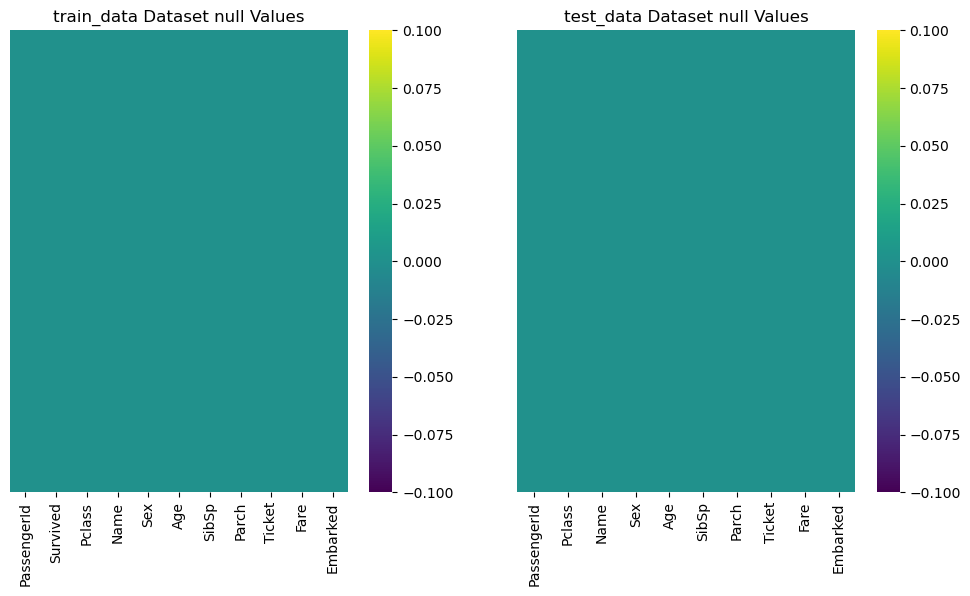

In [86]:
plt.figure(figsize=(12,6))
plt.subplot(121)
sns.heatmap(train_data.isnull(), yticklabels=False, cmap='viridis')
plt.title('train_data Dataset null Values')
plt.subplot(122)
sns.heatmap(test_data.isnull(), yticklabels=False, cmap='viridis')
plt.title('test_data Dataset null Values')
plt.show()

In [137]:
train_data.select_dtypes(['object']).columns

Index(['Name', 'Sex', 'Ticket', 'Embarked'], dtype='object')

In [110]:
train_data[train_data['Pclass']==3]['Survived'].value_counts()

0    372
1    119
Name: Survived, dtype: int64

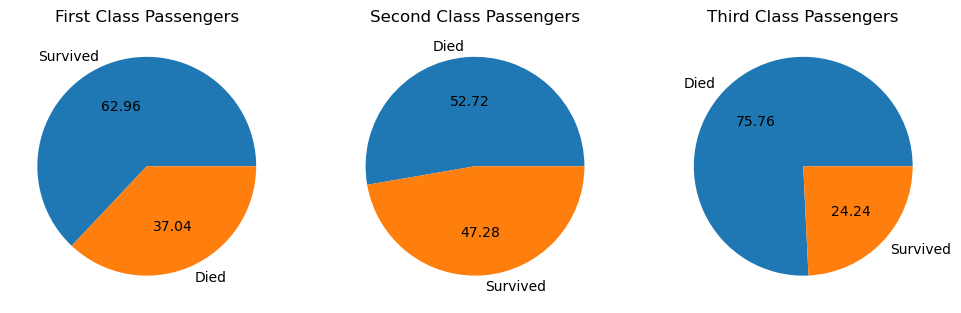

In [115]:
plt.figure(figsize=(12,6))
plt.subplot(131)
plt.pie(train_data[train_data['Pclass']==1]['Survived'].value_counts(), labels=['Survived', 'Died'], autopct='%0.2f')
plt.title('First Class Passengers')
plt.subplot(132)
plt.pie(train_data[train_data['Pclass']==2]['Survived'].value_counts(), labels=['Died', 'Survived'], autopct='%0.2f')
plt.title('Second Class Passengers')
plt.subplot(133)
plt.pie(train_data[train_data['Pclass']==3]['Survived'].value_counts(), labels=['Died', 'Survived'], autopct='%0.2f')
plt.title('Third Class Passengers')
plt.show()

In [133]:
train_data.groupby(['Pclass'])['Survived'].mean()*100

Pclass
1    62.962963
2    47.282609
3    24.236253
Name: Survived, dtype: float64

In [125]:
train_data[train_data['Sex']=='female']['Survived'].value_counts()

1    233
0     81
Name: Survived, dtype: int64

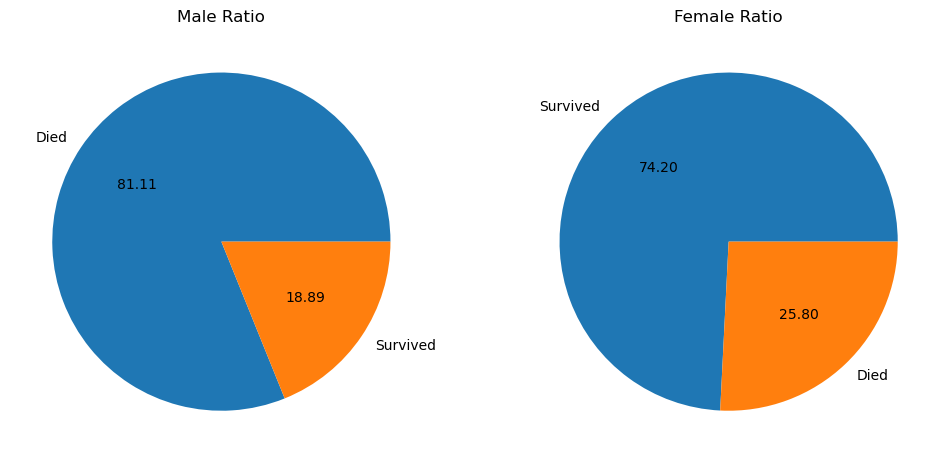

In [127]:
plt.figure(figsize=(12,6))
plt.subplot(121)
plt.pie(train_data[train_data['Sex']=='male']['Survived'].value_counts(), labels=['Died', 'Survived'], autopct='%0.2f')
plt.title('Male Ratio')
plt.subplot(122)
plt.pie(train_data[train_data['Sex']=='female']['Survived'].value_counts(), labels=['Survived', 'Died'], autopct='%0.2f')
plt.title('Female Ratio')
plt.show()

In [132]:
train_data.groupby(['Sex'])['Survived'].mean()*100

Sex
female    74.203822
male      18.890815
Name: Survived, dtype: float64

In [138]:
train_data['Embarked'].unique()

array(['S', 'C', 'Q'], dtype=object)

In [141]:
train_data.groupby(['Embarked'])['Survived'].mean()

Embarked
C    0.553571
Q    0.389610
S    0.339009
Name: Survived, dtype: float64

C:\Users\admin\AppData\Local\Temp\ipykernel_8100\1172645931.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train_data['Age'][train_data['Survived']==0], label='Died')
C:\Users\admin\AppData\Local\Temp\ipykernel_8100\1172645931.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train_data['

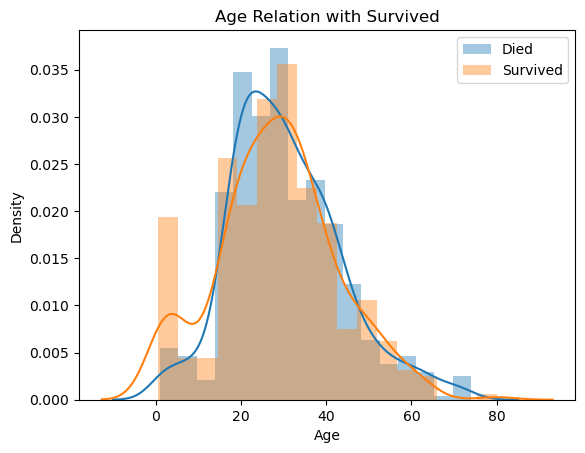

In [164]:
sns.distplot(train_data['Age'][train_data['Survived']==0], label='Died')
sns.distplot(train_data['Age'][train_data['Survived']==1], label='Survived')
plt.title('Age Relation with Survived')
plt.legend()
plt.show()

C:\Users\admin\AppData\Local\Temp\ipykernel_8100\42779441.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train_data['Fare'][train_data['Survived']==0], label='Died')
C:\Users\admin\AppData\Local\Temp\ipykernel_8100\42779441.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train_data['Far

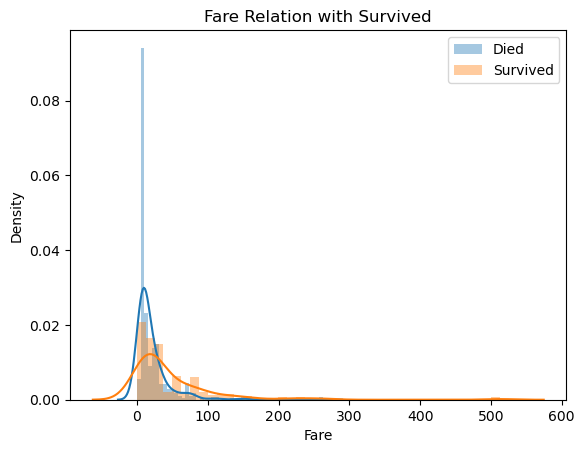

In [163]:
sns.distplot(train_data['Fare'][train_data['Survived']==0], label='Died')
sns.distplot(train_data['Fare'][train_data['Survived']==1], label='Survived')
plt.title('Fare Relation with Survived')
plt.legend()
plt.show()

In [166]:
train_data['Ticket'].unique()

array(['A/5 21171', 'PC 17599', 'STON/O2. 3101282', '113803', '373450',
       '330877', '17463', '349909', '347742', '237736', 'PP 9549',
       '113783', 'A/5. 2151', '347082', '350406', '248706', '382652',
       '244373', '345763', '2649', '239865', '248698', '330923', '113788',
       '347077', '2631', '19950', '330959', '349216', 'PC 17601',
       'PC 17569', '335677', 'C.A. 24579', 'PC 17604', '113789', '2677',
       'A./5. 2152', '345764', '2651', '7546', '11668', '349253',
       'SC/Paris 2123', '330958', 'S.C./A.4. 23567', '370371', '14311',
       '2662', '349237', '3101295', 'A/4. 39886', 'PC 17572', '2926',
       '113509', '19947', 'C.A. 31026', '2697', 'C.A. 34651', 'CA 2144',
       '2669', '113572', '36973', '347088', 'PC 17605', '2661',
       'C.A. 29395', 'S.P. 3464', '3101281', '315151', 'C.A. 33111',
       'S.O.C. 14879', '2680', '1601', '348123', '349208', '374746',
       '248738', '364516', '345767', '345779', '330932', '113059',
       'SO/C 14885', '31012

In [168]:
train_data.drop(columns=['Ticket'], inplace=True)
test_data.drop(columns=['Ticket'], inplace=True)

In [172]:
train_data.select_dtypes(['int', 'float']).columns

Index(['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare'], dtype='object')

In [174]:
train_data.select_dtypes(['object']).columns

Index(['Name', 'Sex', 'Embarked'], dtype='object')

In [176]:
train_data.sample(6)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
401,402,0,3,"Adams, Mr. John",male,26.0,0,0,8.0500,S
360,361,0,3,"Skoog, Mr. Wilhelm",male,40.0,1,4,27.9000,S
443,444,1,2,"Reynaldo, Ms. Encarnacion",female,28.0,0,0,13.0000,S
708,709,1,1,"Cleaver, Miss. Alice",female,22.0,0,0,151.5500,S
698,699,0,1,"Thayer, Mr. John Borland",male,49.0,1,1,110.8833,C
264,265,0,3,"Henry, Miss. Delia",female,21.0,0,0,7.7500,Q


In [177]:
train_data['Family_Members']=train_data['SibSp']+train_data['Parch']+1

In [178]:
train_data.sample(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Family_Members
879,880,1,1,"Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)",female,56.0,0,1,83.1583,C,2
355,356,0,3,"Vanden Steen, Mr. Leo Peter",male,28.0,0,0,9.5000,S,1
307,308,1,1,"Penasco y Castellana, Mrs. Victor de Satode (M...",female,17.0,1,0,108.9000,C,2
449,450,1,1,"Peuchen, Major. Arthur Godfrey",male,52.0,0,0,30.5000,S,1
147,148,0,3,"Ford, Miss. Robina Maggie ""Ruby""",female,9.0,2,2,34.3750,S,5


In [179]:
test_data['Family_Members']=test_data['SibSp']+test_data['Parch']+1

In [185]:
train_data.groupby(['Family_Members'])['Survived'].mean()*100

Family_Members
1     30.353818
2     55.279503
3     57.843137
4     72.413793
5     20.000000
6     13.636364
7     33.333333
8      0.000000
11     0.000000
Name: Survived, dtype: float64

In [186]:
def family_size(number):
    if number==1:
        return 'Alone'
    elif number>1 and number <5:
        return 'Medium'
    else:
        return 'Large'

In [188]:
train_data['Family_Size']=train_data['Family_Members'].apply(family_size)

In [189]:
test_data['Family_Size']=test_data['Family_Members'].apply(family_size)

In [193]:
train_data.sample()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Family_Members,Family_Size
878,879,0,3,"Laleff, Mr. Kristo",male,32.0,0,0,7.8958,S,1,Alone


In [194]:
train_data.drop(columns=['SibSp', 'Parch', 'Family_Members'], inplace=True)

In [195]:
test_data.sample()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Family_Members,Family_Size
281,1173,3,"Peacock, Master. Alfred Edward",male,0.75,1,1,13.775,S,3,Medium


In [196]:
test_data.drop(columns=['SibSp', 'Parch', 'Family_Members'], inplace=True)

In [197]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,Fare,Embarked,Family_Size
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,7.2500,S,Medium
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,71.2833,C,Medium
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,7.9250,S,Alone
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,53.1000,S,Medium
4,5,0,3,"Allen, Mr. William Henry",male,35.0,8.0500,S,Alone


In [200]:
p_id=test_data['PassengerId'].values

In [203]:
train_data.drop(columns=['PassengerId', 'Name'], inplace=True)
test_data.drop(columns=['PassengerId', 'Name'], inplace=True)

In [204]:
print('Train Dta', train_data.shape)
print('Test Dta', test_data.shape)

Train Dta (891, 7)
Test Dta (418, 6)


In [207]:
train_data.select_dtypes(['object']).columns

Index(['Sex', 'Embarked', 'Family_Size'], dtype='object')

In [208]:
train_data.select_dtypes(['int', 'float']).columns

Index(['Survived', 'Pclass', 'Age', 'Fare'], dtype='object')

In [213]:
train_data=pd.get_dummies(train_data, columns=['Sex', 'Embarked', 'Family_Size', 'Pclass'], drop_first=True)

In [218]:
train_data.sample(3)

,Survived,Age,Fare,Sex_male,Embarked_Q,Embarked_S,Family_Size_Large,Family_Size_Medium,Pclass_2,Pclass_3
854,0,44.0,26.0000,0,0,1,0,1,1,0
420,0,24.0,7.8958,1,0,0,0,0,0,1
822,0,38.0,0.0000,1,0,1,0,0,0,0


In [215]:
test_data.columns

Index(['Pclass', 'Sex', 'Age', 'Fare', 'Embarked', 'Family_Size'], dtype='object')

In [217]:
test_data=pd.get_dummies(test_data, columns=['Pclass', 'Sex', 'Embarked', 'Family_Size'], drop_first=True)

In [220]:
test_data.sample(3)

,Age,Fare,Pclass_2,Pclass_3,Sex_male,Embarked_Q,Embarked_S,Family_Size_Large,Family_Size_Medium
365,27.0,69.55,0,1,0,0,1,1,0
88,31.0,7.75,0,1,0,1,0,0,0
373,44.0,13.00,1,0,1,0,1,0,0


In [221]:
print('Train Data', train_data.shape)
print('Test Data', test_data.shape)

Train Data (891, 10)
Test Data (418, 9)


In [222]:
train_data.sample()

,Survived,Age,Fare,Sex_male,Embarked_Q,Embarked_S,Family_Size_Large,Family_Size_Medium,Pclass_2,Pclass_3
417,1,18.0,13.0,0,0,1,0,1,1,0


In [224]:
x=train_data.iloc[:,1:]

In [226]:
y=train_data.iloc[:,0]

In [231]:
from sklearn.model_selection import train_test_split

In [232]:
x_train,x_test, y_train,y_test=train_test_split(x, y, test_size=0.2, random_state=11)

In [233]:
from sklearn.tree import DecisionTreeClassifier

In [358]:
decision_tree=DecisionTreeClassifier(max_depth=11)

In [359]:
decision_tree.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=11)

In [360]:
decision_tree_pred=decision_tree.predict(x_test)

In [361]:
from sklearn.metrics import accuracy_score

In [362]:
print('Accuracy Score\n', accuracy_score(y_test, decision_tree_pred))

Accuracy Score
 0.7877094972067039


In [364]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, BaggingClassifier, ExtraTreesClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier

In [377]:
lr=LogisticRegression(solver='liblinear')
svc=SVC(kernel='sigmoid',gamma=1.0)
knc=KNeighborsClassifier()
rf=RandomForestClassifier(n_estimators=50, random_state=3)
ab=AdaBoostClassifier(n_estimators=50, random_state=3)
bc=BaggingClassifier(n_estimators=52, random_state=2)
et=ExtraTreesClassifier(n_estimators=49, random_state=4)
gb=GradientBoostingClassifier(n_estimators=50, random_state=3)
xgb=XGBClassifier(n_estimators=50, random_state=2)

In [378]:
models={
    'Logistic Regression':lr,
    'SVC':svc,
    'K Neighbors':knc,
    'Random Forest':rf,
    'Ada Boost':ab,
    'Bagging C':bc,
    'Extra Trees':et,
    'Gradient Boost':gb,
    'XGB':xgb
}

In [379]:
def model_training(md, x_train, y_train, x_test, y_test):
    md.fit(x_train, y_train)
    y_pred=md.predict(x_test)
    accuracy=accuracy_score(y_test, y_pred)
    return accuracy

In [380]:
accuracy=[]

for name, md in models.items():
    current_accuracy=model_training(md, x_train, y_train, x_test, y_test)
    
    print('for', name)
    print('accuracy--->', current_accuracy)
    
    accuracy.append(current_accuracy)

for Logistic Regression
accuracy---> 0.8715083798882681
for SVC
accuracy---> 0.659217877094972
for K Neighbors
accuracy---> 0.6759776536312849
for Random Forest
accuracy---> 0.8379888268156425
for Ada Boost
accuracy---> 0.8379888268156425
for Bagging C
accuracy---> 0.8324022346368715
for Extra Trees
accuracy---> 0.7988826815642458
for Gradient Boost
accuracy---> 0.8603351955307262
for XGB
accuracy---> 0.8379888268156425


In [389]:
x_final=test_data.loc[:,:].values

In [390]:
y_final=lr.predict(x_final)

C:\Users\admin\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
